In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [4]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [5]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [6]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


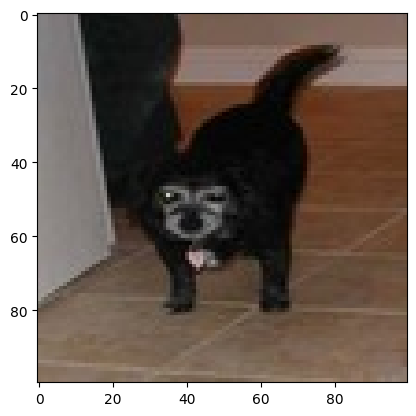

In [7]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [8]:
# xây dựng là một mạng nơ-ron tích chập cơ bản, thích hợp cho việc xử lý hình ảnh
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

c:\Users\ngoph\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [9]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [10]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [11]:
model.fit(X_train, Y_train, epochs = 15, batch_size = 64)
# Lưu mô hình đã huấn luyện
model.save('trained_model.h5')

Epoch 1/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 146ms/step - accuracy: 0.4997 - loss: 0.7449
Epoch 2/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - accuracy: 0.6246 - loss: 0.6879
Epoch 3/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - accuracy: 0.5402 - loss: 0.6794
Epoch 4/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.6233 - loss: 0.6422
Epoch 5/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - accuracy: 0.7015 - loss: 0.5855
Epoch 6/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.7245 - loss: 0.5454
Epoch 7/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.7321 - loss: 0.5289
Epoch 8/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - accuracy: 0.7676 - loss: 0.4805
Epoch 9/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.8201 - loss: 0.4345
Epoch 10/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - accuracy: 0.8320 - loss: 0.4014
Epoch 11/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.8544 - loss: 0.3555
Epoch 12/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step

In [12]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6180 - loss: 0.9342


[0.6955703496932983, 0.6899999976158142]

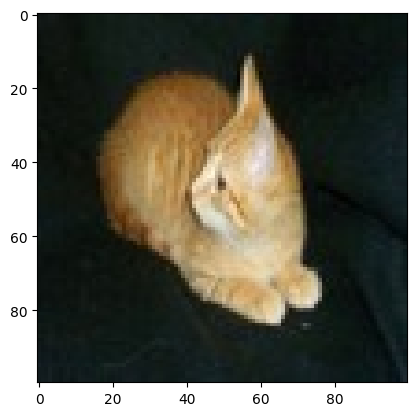

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
đây là con : mèo


In [45]:
from keras.models import load_model

# Load mô hình từ file đã lưu
loaded_model = load_model('trained_model.h5')
#random hình ảnh để phân biệt
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = loaded_model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'chó'
else:
    pred = 'mèo'
    
print("đây là con :", pred)

In [1]:
import random
import matplotlib.pyplot as plt

# Chọn một ảnh ngẫu nhiên từ tập test
idx2 = random.randint(0, len(Y_test) - 1)
plt.imshow(X_test[idx2])
plt.show()

# Dự đoán loại của ảnh
y_pred = model.predict(X_test[idx2].reshape(1, 100, 100, 3))
if y_pred[0][0] < 0.5:
    pred = 'cat'
else:
    pred = 'dog'

print("Our model says it is a:", pred)

NameError: name 'Y_test' is not defined

In [47]:
#trích xuất từ camera
import cv2
import numpy as np

# Load pre-trained model


# Khởi tạo camera
cap = cv2.VideoCapture(0)

while True:
    # Đọc frame từ camera
    ret, frame = cap.read()
    
    if not ret:
        print("Không thể đọc frame từ camera")
        break
    
    # Resize frame thành kích thước mong muốn (ví dụ: 100x100)
    resized_frame = cv2.resize(frame, (100, 100))
    
    # Chuyển đổi frame sang định dạng mà mô hình mong đợi (ví dụ: 32-bit floating point và normalize)
    normalized_frame = resized_frame.astype(np.float32) / 255.0
    
    # Thực hiện dự đoán
    prediction = model.predict(normalized_frame.reshape(1, 100, 100, 3))
    
    # Hiển thị dự đoán trên frame
    if prediction < 0.5:
        cv2.putText(frame, "Cat", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    else:
        cv2.putText(frame, "Dog", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    # Hiển thị frame
    cv2.imshow('Camera', frame)
    
    # Đợi phím nhấn ESC để thoát
    if cv2.waitKey(1) & 0xFF == 27:
        break

# Giải phóng camera và đóng cửa sổ
cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━